In [1]:
import matplotlib.pyplot as plt
#import mplhep as hep
import json

In [2]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

In [3]:
with open('residuals.json') as f:
    residuals = json.load(f)

In [4]:
vbl_names = {'x':r'Predicted - true $x$ [um]', 'y':r'Predicted - true $y$ [um]', 'A':r'Predicted - true $\alpha$ [deg.]', 'B':r'Predicted - true $\beta$ [deg.]'}

In [5]:
def draw_one_vbl(vbl, x, d, ax_ii):
    
    x_array = [-1*x]
    y_array = [d['mean_'+vbl]]
    yerr_array = [[d['down68_'+vbl]],[d['up68_'+vbl]]]
    yerr2_array = [[d['mean_downsigma'+vbl]],[d['mean_upsigma'+vbl]]]
    
    line1 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr_array, color = colors[x], linestyle='')
    line2 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr2_array, elinewidth=10, alpha=0.2, color = colors[x], linestyle='')
    dot1 = ax_ii.scatter(y_array, x_array, marker='o', color = colors[x])

    ax_ii.set_xlabel(vbl_names[vbl])
    ax_ii.set_yticks([])

    return [line1,line2], [dot1]#,dot3,dot4]

def draw_one_vbl_slim(vbl, x, d, ax_ii):
    
    x_array = [-1*x]
    y_array = [d['mean_'+vbl]]
    yerr_array = [[d['down68_'+vbl]],[d['up68_'+vbl]]]
    
    line1 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr_array, color = colors[x], linestyle='')
    #line2 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr2_array, elinewidth=10, alpha=0.2, color = colors[x], linestyle='')
    dot1 = ax_ii.scatter(y_array, x_array, marker='o', color = colors[x])

    ax_ii.set_xlabel(vbl_names[vbl])
    ax_ii.set_yticks([])

    return [line1], [dot1]#,dot3,dot4]
    
def draw_one_model(x, d, ax, slim = False):

    if slim:     
        line, dots = draw_one_vbl_slim('x', x, d, ax[1][0])
        line, dots = draw_one_vbl_slim('y', x, d, ax[1][1])
        line, dots = draw_one_vbl_slim('B', x, d, ax[1][3])
        
    else:
        line, dots = draw_one_vbl('x', x, d, ax[1][0])
        line, dots = draw_one_vbl('y', x, d, ax[1][1])
        line, dots = draw_one_vbl('A', x, d, ax[1][2])
        line, dots = draw_one_vbl('B', x, d, ax[1][3])

    return line, dots


In [6]:
def format_plot(ax, n_models=4, slim=False):
    ax[1][0].plot([0,0],[1,-1*n_models],color='gray', zorder=0)
    ax[1][1].plot([0,0],[1,-1*n_models],color='gray', zorder=0)
    ax[1][2].plot([0,0],[1,-1*n_models],color='gray', zorder=0)
    ax[1][3].plot([0,0],[1,-1*n_models],color='gray', zorder=0)

    # x limits
    ax[1][0].set_xlim(-15,15) # x
    ax[1][1].set_xlim(-4,4) # y
    ax[1][2].set_xlim(-8,8) # alpha
    ax[1][3].set_xlim(-5,5) # beta
    
    ax[1][0].set_ylim(-1*n_models+0.5,0.5)
    ax[1][1].set_ylim(-1*n_models+0.5,0.5)
    ax[1][2].set_ylim(-1*n_models+0.5,0.5) 
    ax[1][3].set_ylim(-1*n_models+0.5,0.5)

/tmp/ipykernel_3653743/1762082059.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


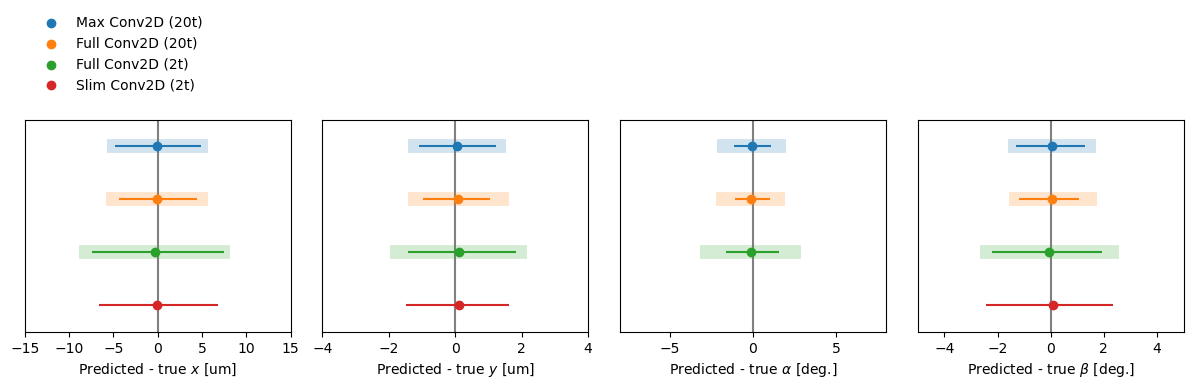

In [7]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 3]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

dots = []

models = [residuals["max_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["2-noquant_2t"],
          residuals["slim_2dconv"]["2-noquant_2t"],
]
format_plot(ax, 4)

for i,m in enumerate(models):

    slim = False
    if i == 3:
        slim = True
    
    l, d = draw_one_model(i, m, ax, slim = slim)
    dots += d
    
#ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][0].legend(dots,['Max Conv2D (20t)','Full Conv2D (20t)','Full Conv2D (2t)','Slim Conv2D (2t)',],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/cpad-slim.pdf")
plt.savefig("plots/cpad-slim.png")

plt.show()

/tmp/ipykernel_3653743/1993472553.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


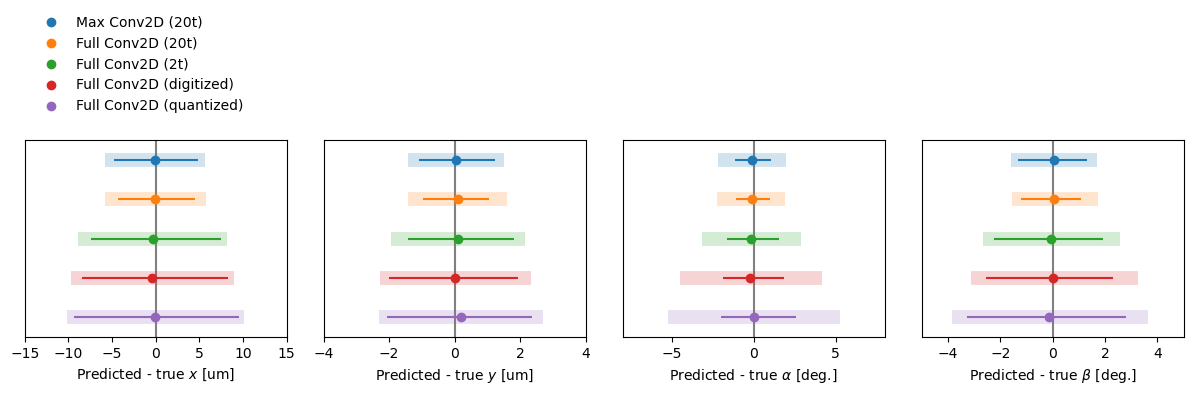

In [8]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 3]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

dots = []

models = [residuals["max_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["2-noquant_2t"],
          residuals["full_2dconv"]["3-input_dig_2t"],
          residuals["full_2dconv"]["4-quantized"],
]
format_plot(ax, 5)

for i,m in enumerate(models):
    
    l, d = draw_one_model(i, m, ax)
    dots += d
    
#ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][0].legend(dots,['Max Conv2D (20t)','Full Conv2D (20t)','Full Conv2D (2t)','Full Conv2D (digitized)','Full Conv2D (quantized)'],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/cpad-5.pdf")
plt.savefig("plots/cpad-5.png")

plt.show()

/tmp/ipykernel_3653743/3588529979.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


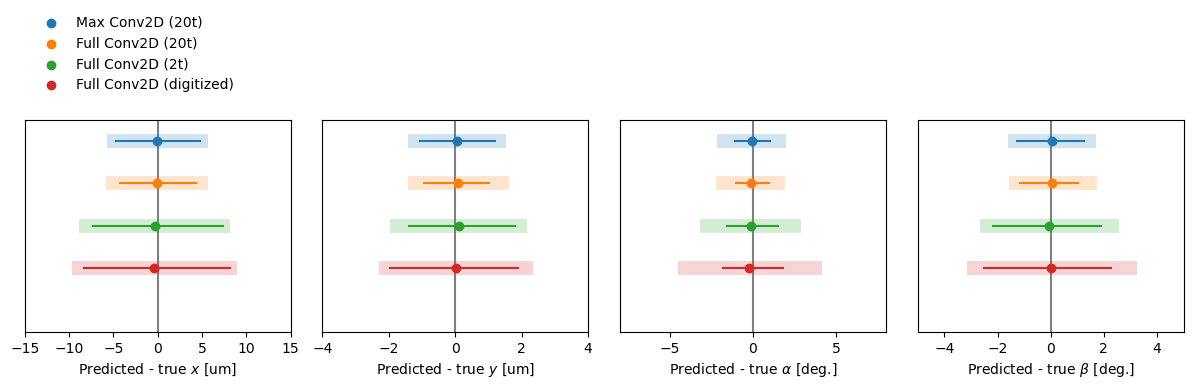

In [9]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 3]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

dots = []

models = [residuals["max_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["2-noquant_2t"],
          residuals["full_2dconv"]["3-input_dig_2t"],
          #residuals["full_2dconv"]["4-quantized"],
         ]
format_plot(ax, 5)

for i,m in enumerate(models):
    
    l, d = draw_one_model(i, m, ax)
    dots += d
    
#ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][0].legend(dots,['Max Conv2D (20t)','Full Conv2D (20t)','Full Conv2D (2t)','Full Conv2D (digitized)',],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/cpad-4.pdf")
plt.savefig("plots/cpad-4.png")

plt.show()

/tmp/ipykernel_3653743/1907094654.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


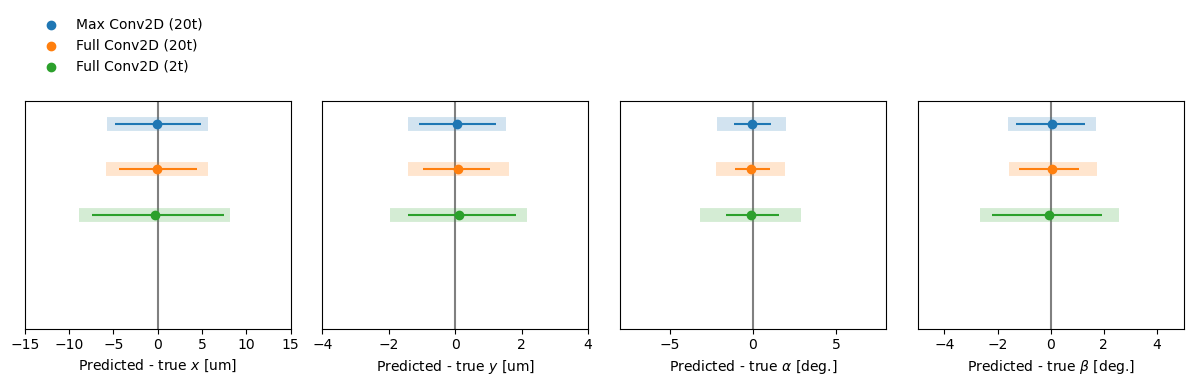

In [10]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 3]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

dots = []

models = [residuals["max_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["2-noquant_2t"],
          #residuals["full_2dconv"]["3-input_dig_2t"]
         ]
format_plot(ax, 5)

for i,m in enumerate(models):
    
    l, d = draw_one_model(i, m, ax)
    dots += d
    
#ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][0].legend(dots,['Max Conv2D (20t)','Full Conv2D (20t)','Full Conv2D (2t)',],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/cpad-3.pdf")
plt.savefig("plots/cpad-3.png")

plt.show()

/tmp/ipykernel_3653743/3787437348.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


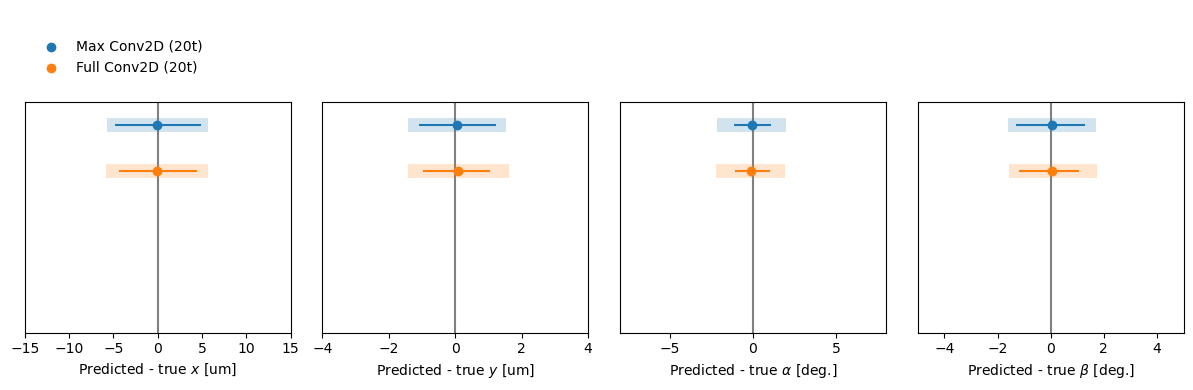

In [11]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 3]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

dots = []

models = [residuals["max_2dconv"]["1-noquant_20t"],
          residuals["full_2dconv"]["1-noquant_20t"],
          #residuals["full_2dconv"]["2-noquant_2t"],
          #residuals["full_2dconv"]["3-input_dig_2t"]
         ]
format_plot(ax, 5)

for i,m in enumerate(models):
    
    l, d = draw_one_model(i, m, ax)
    dots += d
    
#ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][0].legend(dots,['Max Conv2D (20t)','Full Conv2D (20t)'],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/cpad-2.pdf")
plt.savefig("plots/cpad-2.png")

plt.show()

/tmp/ipykernel_3653743/1815658957.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


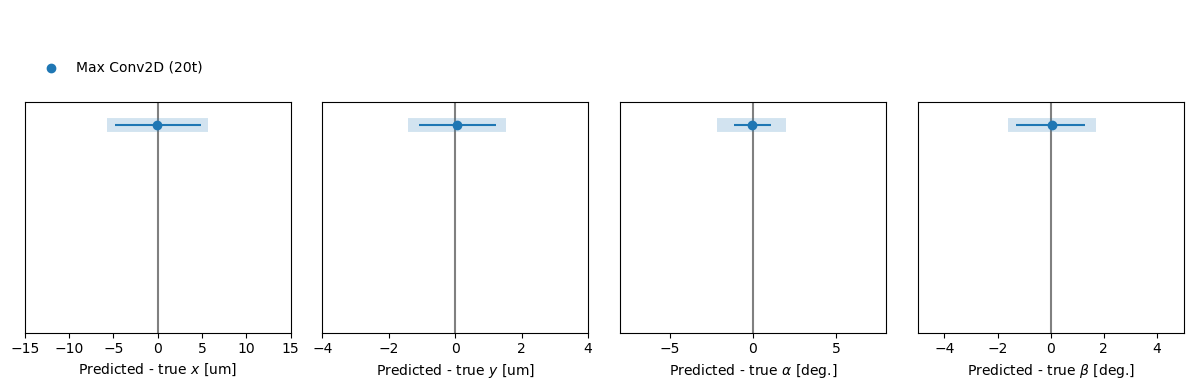

In [12]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 3]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

dots = []

models = [residuals["max_2dconv"]["1-noquant_20t"],
          #residuals["full_2dconv"]["1-noquant_20t"],
          #residuals["full_2dconv"]["2-noquant_2t"],
          #residuals["full_2dconv"]["3-input_dig_2t"]
         ]
format_plot(ax, 5)

for i,m in enumerate(models):
    
    l, d = draw_one_model(i, m, ax)
    dots += d
    
#ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][0].legend(dots,['Max Conv2D (20t)'],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/cpad-1.pdf")
plt.savefig("plots/cpad-1.png")

plt.show()